<a href="https://colab.research.google.com/github/cygkichi/dl4us_test/blob/master/1D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


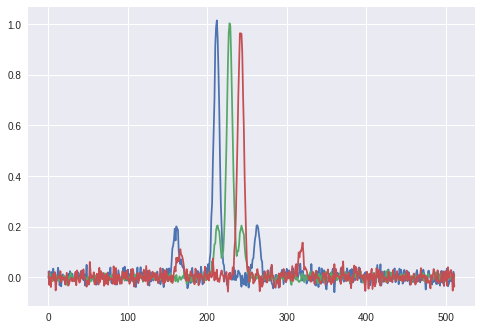

In [0]:
# Generate Data
def xs_data(label=0):
    def func(N=512, m=50, s1=1, s2=1, d=10, da=0.2, ra=0.02):
        xs = np.linspace(0,100,N)
        ys = np.zeros(N)
        ys += np.exp(-((xs-m  )/s1)**2)
        ys += np.exp(-((xs-m-d)/s2)**2) * da
        ys += np.exp(-((xs-m+d)/s2)**2) * da
        ys += np.random.randn(N) * ra
        return ys

    m = 40 + 20*np.random.rand()
    if label == 0:
        return func(m=m, d=10)
    elif label == 1:
        return func(m=m, d=3, ra=0.01)
    elif label == 2:
        return func(m=m, d=15, da=0.1)

plt.plot(xs_data(label = 0))
plt.plot(xs_data(label = 1))
plt.plot(xs_data(label = 2))
plt.show()

#x_train = np.random.rand(10,512,1)
#y_train = np.random.rand(10,10)
#x_valid = np.random.rand(10,512,1)
#y_valid = np.random.rand(10,10)

In [0]:
num_samples = 1000
num_labels  = 3

ys = np.random.randint(0,num_labels, num_samples)
xs = np.array([xs_data(label=l) for l in ys])

xs = xs.reshape(num_samples, 512, 1)
ys = np.eye(num_labels)[ys]

x_train = xs[:900]
y_train = ys[:900]
x_valid = xs[900:]
y_valid = ys[900:]


In [0]:
model = Sequential()
#model.add(Conv1D(filters=512, kernel_size=20))
#model.add(Activation('relu'))
model.add(Dense(512, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=150, validation_data=(x_valid, y_valid), batch_size=20)

Train on 900 samples, validate on 100 samples
Epoch 1/150
900/900 [==============================] - 4s 5ms/step - loss: 0.2221 - acc: 0.3622 - val_loss: 0.2218 - val_acc: 0.4500
Epoch 2/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2219 - acc: 0.3933 - val_loss: 0.2216 - val_acc: 0.3700
Epoch 3/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2216 - acc: 0.3956 - val_loss: 0.2215 - val_acc: 0.3300
Epoch 4/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2214 - acc: 0.3856 - val_loss: 0.2213 - val_acc: 0.3300
Epoch 5/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2211 - acc: 0.3789 - val_loss: 0.2211 - val_acc: 0.3200
Epoch 6/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2208 - acc: 0.3767 - val_loss: 0.2209 - val_acc: 0.3200
Epoch 7/150
900/900 [==============================] - 3s 3ms/step - loss: 0.2205 - acc: 0.3733 - val_loss: 0.2207 - val_acc: 0.3200
Epoch 8/150
900/900 [==

In [0]:
model.evaluate(x_valid, y_valid, batch_size=128)

100/100 [==============================] - 0s 469us/step


[0.19653184711933136, 0.5899999737739563]

In [0]:
model.predict(x_valid[:10], batch_size=None, verbose=0, steps=None)


array([[0.3151479 , 0.39292192, 0.29193014],
       [0.31376883, 0.28590393, 0.40032727],
       [0.36778456, 0.35353795, 0.27867758],
       [0.33128622, 0.39290872, 0.27580503],
       [0.28467375, 0.39851028, 0.316816  ],
       [0.3045413 , 0.48435035, 0.21110834],
       [0.33754766, 0.2787454 , 0.383707  ],
       [0.3765812 , 0.2972321 , 0.32618675],
       [0.33831266, 0.36412472, 0.29756266],
       [0.3588865 , 0.3693088 , 0.2718047 ]], dtype=float32)

In [0]:
y_valid[:10]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

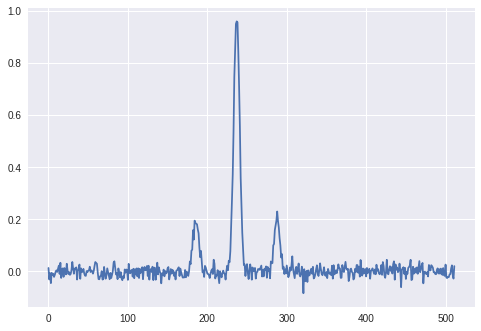

In [0]:
plt.plot(x_valid[9].T.reshape(512))
plt.show()

In [0]:
!git clone https://github.com/albermax/innvestigate.git
import os
os.chdir('innvestigate')
!python setup.py test

In [0]:
import innvestigate

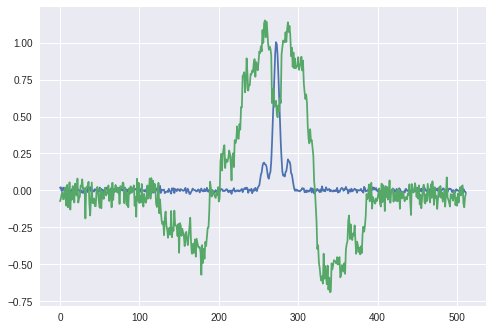

In [0]:
model_wo_sm = innvestigate.utils.keras.graph.model_wo_softmax(model)
gradient_analyzer = innvestigate.analyzer.Gradient(model_wo_sm)
analysis = gradient_analyzer.analyze(x_valid[20:21])

plt.plot(x_valid[20:21].flatten())
plt.plot(analysis.flatten())
#plot.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
plt.show()

In [0]:
analysis.shape


(1, 512, 1)

In [0]:
}